# Анализ отзывов ресторанов

## 1. Предобработка данных и анализ текста

### 1.1. Импорт библиотек и загрузка данных

In [2]:
!pip install nltk

     ---------------------------------------- 0.0/42.0 kB ? eta -:--:--
     ---------------------------------------- 42.0/42.0 kB 2.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ----------- ---------------------------- 0.4/1.5 MB 8.7 MB/s eta 0:00:01
   ------------------ --------------------- 0.7/1.5 MB 8.8 MB/s eta 0:00:01
   ---------------------------------------  1.5/1.5 MB 10.6 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 10.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/268.5 kB ? eta -:--:--
   --------------------------------------- 268.5/268.5 kB 16.1 MB/s eta 0:00:00


In [3]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

In [73]:
from sklearn.utils import shuffle

In [4]:
# Загрузка необходимых ресурсов для NLTK
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\akhim\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\akhim\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\akhim\AppData\Roaming\nltk_data...


True

In [30]:
# Загрузка датасета
with open('./DataSet/yelp_academic_dataset_review.json', 'r', encoding='utf-8') as f:
    data = [json.loads(line) for line in f]

df = pd.DataFrame(data)

### 1.2. EDA (Исследовательский анализ данных)

In [31]:
# Просмотр первых строк датасета
print("Первые 5 строк датасета:")
print(df.head())

Первые 5 строк датасета:
                review_id                 user_id             business_id  \
0  KU_O5udG6zpxOg-VcAEodg  mh_-eMZ6K5RLWhZyISBhwA  XQfwVwDr-v0ZS3_CbbE5Xw   
1  BiTunyQ73aT9WBnpR9DZGw  OyoGAe7OKpv6SyGZT5g77Q  7ATYjTIgM3jUlt4UM3IypQ   
2  saUsX_uimxRlCVr67Z4Jig  8g_iMtfSiwikVnbP2etR0A  YjUWPpI6HXG530lwP-fb2A   
3  AqPFMleE6RsU23_auESxiA  _7bHUi9Uuf5__HHc_Q8guQ  kxX2SOes4o-D3ZQBkiMRfA   
4  Sx8TMOWLNuJBWer-0pcmoA  bcjbaE6dDog4jkNY91ncLQ  e4Vwtrqf-wpJfwesgvdgxQ   

   stars  useful  funny  cool  \
0    3.0       0      0     0   
1    5.0       1      0     1   
2    3.0       0      0     0   
3    5.0       1      0     1   
4    4.0       1      0     1   

                                                text                 date  
0  If you decide to eat here, just be aware it is...  2018-07-07 22:09:11  
1  I've taken a lot of spin classes over the year...  2012-01-03 15:28:18  
2  Family diner. Had the buffet. Eclectic assortm...  2014-02-05 20:30:30  
3  Wow!  

In [32]:
df.info

<bound method DataFrame.info of                       review_id                 user_id  \
0        KU_O5udG6zpxOg-VcAEodg  mh_-eMZ6K5RLWhZyISBhwA   
1        BiTunyQ73aT9WBnpR9DZGw  OyoGAe7OKpv6SyGZT5g77Q   
2        saUsX_uimxRlCVr67Z4Jig  8g_iMtfSiwikVnbP2etR0A   
3        AqPFMleE6RsU23_auESxiA  _7bHUi9Uuf5__HHc_Q8guQ   
4        Sx8TMOWLNuJBWer-0pcmoA  bcjbaE6dDog4jkNY91ncLQ   
...                         ...                     ...   
6990275  H0RIamZu0B0Ei0P4aeh3sQ  qskILQ3k0I_qcCMI-k6_QQ   
6990276  shTPgbgdwTHSuU67mGCmZQ  Zo0th2m8Ez4gLSbHftiQvg   
6990277  YNfNhgZlaaCO5Q_YJR4rEw  mm6E4FbCMwJmb7kPDZ5v2Q   
6990278  i-I4ZOhoX70Nw5H0FwrQUA  YwAMC-jvZ1fvEUum6QkEkw   
6990279  RwcKOdEuLRHNJe4M9-qpqg  6JehEvdoCvZPJ_XIxnzIIw   

                    business_id  stars  useful  funny  cool  \
0        XQfwVwDr-v0ZS3_CbbE5Xw    3.0       0      0     0   
1        7ATYjTIgM3jUlt4UM3IypQ    5.0       1      0     1   
2        YjUWPpI6HXG530lwP-fb2A    3.0       0      0     0   
3      

In [33]:
# Информация о датасете
print("\nИнформация о датасете:")
print(df.info())


Информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6990280 entries, 0 to 6990279
Data columns (total 9 columns):
 #   Column       Dtype  
---  ------       -----  
 0   review_id    object 
 1   user_id      object 
 2   business_id  object 
 3   stars        float64
 4   useful       int64  
 5   funny        int64  
 6   cool         int64  
 7   text         object 
 8   date         object 
dtypes: float64(1), int64(3), object(5)
memory usage: 480.0+ MB
None


In [34]:
# Статистическое описание числовых столбцов
print("\nСтатистическое описание числовых столбцов:")
print(df.describe())


Статистическое описание числовых столбцов:
              stars        useful         funny          cool
count  6.990280e+06  6.990280e+06  6.990280e+06  6.990280e+06
mean   3.748584e+00  1.184609e+00  3.265596e-01  4.986175e-01
std    1.478705e+00  3.253767e+00  1.688729e+00  2.172460e+00
min    1.000000e+00 -1.000000e+00 -1.000000e+00 -1.000000e+00
25%    3.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
50%    4.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
75%    5.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00
max    5.000000e+00  1.182000e+03  7.920000e+02  4.040000e+02


In [35]:
# Проверка на наличие пропущенных значений
print("\nПроверка на наличие пропущенных значений:")
print(df.isnull().sum())


Проверка на наличие пропущенных значений:
review_id      0
user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
dtype: int64


In [36]:
# Анализ распределения классов (звезды в отзывах)
print("\nРаспределение классов (звезды в отзывах):")
print(df['stars'].value_counts())


Распределение классов (звезды в отзывах):
stars
5.0    3231627
4.0    1452918
1.0    1069561
3.0     691934
2.0     544240
Name: count, dtype: int64


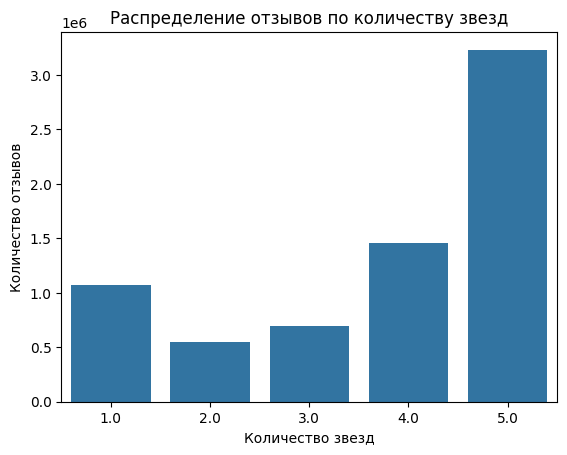

In [37]:
# Визуализация распределения классов
sns.countplot(x='stars', data=df)
plt.title('Распределение отзывов по количеству звезд')
plt.xlabel('Количество звезд')
plt.ylabel('Количество отзывов')
plt.show()

In [38]:
# Преобразование меток (звезды) в бинарные классы (позитивные и негативные), исключая отзывы с 3 звездами
def to_binary_class(stars):
    if stars >= 4:
        return 1
    elif stars <= 2:
        return 0
    else:
        return None

df['label'] = df['stars'].apply(to_binary_class)

In [39]:
# Исключение отзывов с 3 звездами
df = df[df['label'].notna()]

In [40]:
# Анализ распределения классов (звезды в отзывах)
print("\nРаспределение классов (звезды в отзывах):")
print(df['stars'].value_counts())


Распределение классов (звезды в отзывах):
stars
5.0    3231627
4.0    1452918
1.0    1069561
2.0     544240
Name: count, dtype: int64


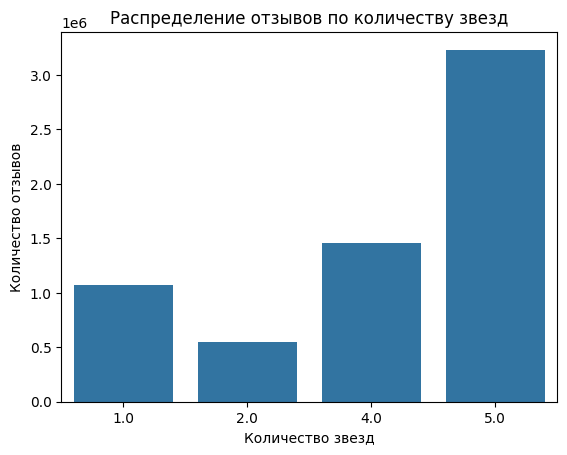

In [41]:
# Визуализация распределения классов
sns.countplot(x='stars', data=df)
plt.title('Распределение отзывов по количеству звезд')
plt.xlabel('Количество звезд')
plt.ylabel('Количество отзывов')
plt.show()

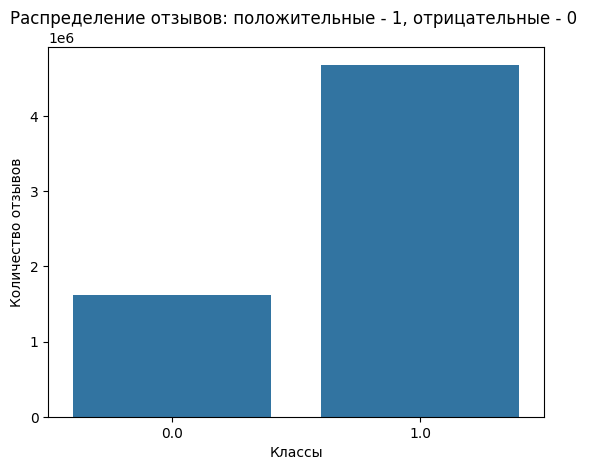

In [43]:
# Визуализация распределения классов
sns.countplot(x='label', data=df)
plt.title('Распределение отзывов: положительные - 1, отрицательные - 0 ')
plt.xlabel('Классы')
plt.ylabel('Количество отзывов')
plt.show()

In [44]:
df.info

<bound method DataFrame.info of                       review_id                 user_id  \
1        BiTunyQ73aT9WBnpR9DZGw  OyoGAe7OKpv6SyGZT5g77Q   
3        AqPFMleE6RsU23_auESxiA  _7bHUi9Uuf5__HHc_Q8guQ   
4        Sx8TMOWLNuJBWer-0pcmoA  bcjbaE6dDog4jkNY91ncLQ   
5        JrIxlS1TzJ-iCu79ul40cQ  eUta8W_HdHMXPzLBBZhL1A   
6        6AxgBCNX_PNTOxmbRSwcKQ  r3zeYsv1XFBRA4dJpL78cw   
...                         ...                     ...   
6990274  YVX1Wsa4LYxjvFwuHBb_gA  RKPkxOYQlM0BjhM-H6_vAw   
6990275  H0RIamZu0B0Ei0P4aeh3sQ  qskILQ3k0I_qcCMI-k6_QQ   
6990276  shTPgbgdwTHSuU67mGCmZQ  Zo0th2m8Ez4gLSbHftiQvg   
6990277  YNfNhgZlaaCO5Q_YJR4rEw  mm6E4FbCMwJmb7kPDZ5v2Q   
6990278  i-I4ZOhoX70Nw5H0FwrQUA  YwAMC-jvZ1fvEUum6QkEkw   

                    business_id  stars  useful  funny  cool  \
1        7ATYjTIgM3jUlt4UM3IypQ    5.0       1      0     1   
3        kxX2SOes4o-D3ZQBkiMRfA    5.0       1      0     1   
4        e4Vwtrqf-wpJfwesgvdgxQ    4.0       1      0     1   
5      

### 1.3. Предобработка данных

In [45]:
# Удаление дубликатов
print(f"Количество дубликатов до удаления: {df.duplicated().sum()}")
df = df.drop_duplicates()
print(f"Количество дубликатов после удаления: {df.duplicated().sum()}")

Количество дубликатов до удаления: 0
Количество дубликатов после удаления: 0


In [46]:
# Очистка текста от лишних символов
def clean_text(text):
    text = text.lower()  # Приведение текста к нижнему регистру
    text = re.sub(r'<.*?>', '', text)  # Удаление HTML-тегов
    text = re.sub(r'[^\w\s]', '', text)  # Удаление знаков препинания
    text = re.sub(r'\d+', '', text)  # Удаление чисел
    return text

In [47]:
df['cleaned_text'] = df['text'].apply(clean_text)

In [48]:
# Токенизация текста
df['tokens'] = df['cleaned_text'].apply(word_tokenize)

In [49]:
# Удаление стоп-слов и лемматизация
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [50]:
def preprocess_text(tokens):
    tokens = [word for word in tokens if word not in stop_words]  # Удаление стоп-слов
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Лемматизация
    return tokens

In [51]:
df['processed_tokens'] = df['tokens'].apply(preprocess_text)

In [52]:
# Вывод первых 5 строк после предобработки
print(df[['cleaned_text', 'tokens', 'processed_tokens']].head())

                                        cleaned_text  \
1  ive taken a lot of spin classes over the years...   
3  wow  yummy different  delicious   our favorite...   
4  cute interior and owner  gave us tour of upcom...   
5  i am a long term frequent customer of this est...   
6  loved this tour i grabbed a groupon and the pr...   

                                              tokens  \
1  [ive, taken, a, lot, of, spin, classes, over, ...   
3  [wow, yummy, different, delicious, our, favori...   
4  [cute, interior, and, owner, gave, us, tour, o...   
5  [i, am, a, long, term, frequent, customer, of,...   
6  [loved, this, tour, i, grabbed, a, groupon, an...   

                                    processed_tokens  
1  [ive, taken, lot, spin, class, year, nothing, ...  
3  [wow, yummy, different, delicious, favorite, l...  
4  [cute, interior, owner, gave, u, tour, upcomin...  
5  [long, term, frequent, customer, establishment...  
6  [loved, tour, grabbed, groupon, price, great, ..

In [53]:
# Сохранение предобработанных данных
df.to_csv('cleaned_reviews.csv', index=False)

#### Загрузка предобработанных данных

In [54]:
# Загрузка предобработанных данных
df01 = pd.read_csv('cleaned_reviews.csv')

In [55]:
# Примерно посмотрим на данные
print(df01.head())

                review_id                 user_id             business_id  \
0  BiTunyQ73aT9WBnpR9DZGw  OyoGAe7OKpv6SyGZT5g77Q  7ATYjTIgM3jUlt4UM3IypQ   
1  AqPFMleE6RsU23_auESxiA  _7bHUi9Uuf5__HHc_Q8guQ  kxX2SOes4o-D3ZQBkiMRfA   
2  Sx8TMOWLNuJBWer-0pcmoA  bcjbaE6dDog4jkNY91ncLQ  e4Vwtrqf-wpJfwesgvdgxQ   
3  JrIxlS1TzJ-iCu79ul40cQ  eUta8W_HdHMXPzLBBZhL1A  04UD14gamNjLY0IDYVhHJg   
4  6AxgBCNX_PNTOxmbRSwcKQ  r3zeYsv1XFBRA4dJpL78cw  gmjsEdUsKpj9Xxu6pdjH0g   

   stars  useful  funny  cool  \
0    5.0       1      0     1   
1    5.0       1      0     1   
2    4.0       1      0     1   
3    1.0       1      2     1   
4    5.0       0      2     0   

                                                text                 date  \
0  I've taken a lot of spin classes over the year...  2012-01-03 15:28:18   
1  Wow!  Yummy, different,  delicious.   Our favo...  2015-01-04 00:01:03   
2  Cute interior and owner (?) gave us tour of up...  2017-01-14 20:54:15   
3  I am a long term frequent c

In [56]:
df01.info

<bound method DataFrame.info of                       review_id                 user_id  \
0        BiTunyQ73aT9WBnpR9DZGw  OyoGAe7OKpv6SyGZT5g77Q   
1        AqPFMleE6RsU23_auESxiA  _7bHUi9Uuf5__HHc_Q8guQ   
2        Sx8TMOWLNuJBWer-0pcmoA  bcjbaE6dDog4jkNY91ncLQ   
3        JrIxlS1TzJ-iCu79ul40cQ  eUta8W_HdHMXPzLBBZhL1A   
4        6AxgBCNX_PNTOxmbRSwcKQ  r3zeYsv1XFBRA4dJpL78cw   
...                         ...                     ...   
6298341  YVX1Wsa4LYxjvFwuHBb_gA  RKPkxOYQlM0BjhM-H6_vAw   
6298342  H0RIamZu0B0Ei0P4aeh3sQ  qskILQ3k0I_qcCMI-k6_QQ   
6298343  shTPgbgdwTHSuU67mGCmZQ  Zo0th2m8Ez4gLSbHftiQvg   
6298344  YNfNhgZlaaCO5Q_YJR4rEw  mm6E4FbCMwJmb7kPDZ5v2Q   
6298345  i-I4ZOhoX70Nw5H0FwrQUA  YwAMC-jvZ1fvEUum6QkEkw   

                    business_id  stars  useful  funny  cool  \
0        7ATYjTIgM3jUlt4UM3IypQ    5.0       1      0     1   
1        kxX2SOes4o-D3ZQBkiMRfA    5.0       1      0     1   
2        e4Vwtrqf-wpJfwesgvdgxQ    4.0       1      0     1   
3      

In [57]:
# Вывод количества уникальных значений по каждому столбцу
for column in df01.columns:
    unique_count = df01[column].nunique()
    print(f"Количество уникальных значений в столбце '{column}': {unique_count}")

Количество уникальных значений в столбце 'review_id': 6298346
Количество уникальных значений в столбце 'user_id': 1933215
Количество уникальных значений в столбце 'business_id': 150344
Количество уникальных значений в столбце 'stars': 4
Количество уникальных значений в столбце 'useful': 256
Количество уникальных значений в столбце 'funny': 196
Количество уникальных значений в столбце 'cool': 208
Количество уникальных значений в столбце 'text': 6283563
Количество уникальных значений в столбце 'date': 6211483
Количество уникальных значений в столбце 'label': 2
Количество уникальных значений в столбце 'cleaned_text': 6281537
Количество уникальных значений в столбце 'tokens': 6280837
Количество уникальных значений в столбце 'processed_tokens': 6279586


In [58]:
# Вывод первых 10 уникальных значений по каждому столбцу
for column in df01.columns:
    unique_values = df01[column].unique()[:10]
    print(f"Первые 10 уникальных значений в столбце '{column}': {unique_values}")


Первые 10 уникальных значений в столбце 'review_id': ['BiTunyQ73aT9WBnpR9DZGw' 'AqPFMleE6RsU23_auESxiA'
 'Sx8TMOWLNuJBWer-0pcmoA' 'JrIxlS1TzJ-iCu79ul40cQ'
 '6AxgBCNX_PNTOxmbRSwcKQ' '_ZeMknuYdlQcUqng_Im3yg'
 'rGQRf8UafX7OTlMNN19I8A' 'l3Wk_mvAog6XANIuGQ9C7Q'
 'XW_LfMv0fV21l9c6xQd_lw' '8JFGBuHMoiNDyfcxuWNtrA']
Первые 10 уникальных значений в столбце 'user_id': ['OyoGAe7OKpv6SyGZT5g77Q' '_7bHUi9Uuf5__HHc_Q8guQ'
 'bcjbaE6dDog4jkNY91ncLQ' 'eUta8W_HdHMXPzLBBZhL1A'
 'r3zeYsv1XFBRA4dJpL78cw' 'yfFzsLmaWF2d4Sr0UNbBgg'
 '1WHRWwQmZOZDAhp2Qyny4g' 'ZbqSHbgCjzVAqaa7NKWn5A'
 '9OAtfnWag-ajVxRbUTGIyg' 'smOvOajNG0lS4Pq7d8g4JQ']
Первые 10 уникальных значений в столбце 'business_id': ['7ATYjTIgM3jUlt4UM3IypQ' 'kxX2SOes4o-D3ZQBkiMRfA'
 'e4Vwtrqf-wpJfwesgvdgxQ' '04UD14gamNjLY0IDYVhHJg'
 'gmjsEdUsKpj9Xxu6pdjH0g' 'LHSTtnW3YHCeUkRDGyJOyw'
 'uMvVYRgGNXf5boolA9HXTw' 'EQ-TZ2eeD_E0BHuvoaeG5Q'
 'lj-E32x9_FA7GmUrBGBEWg' 'RZtGWDLCAtuipwaZ-UfjmQ']
Первые 10 уникальных значений в столбце 'stars': [5. 4. 1. 2.]
Первые 10 

#### Описание столбцов

1. review_id   = идентифицировать каждый отзыв
2. user_id     = идентификаторы пользователей
3. business_id = идентификаторы бизнесов (ресторанов, кафе и т.д.)
4. stars       = оценка бизнеса, ресторана и т.д.
5. useful      = количество пользователей, которые посчитали данный отзыв полезным
6. funny       = сколько раз другие пользователи отметили данный отзыв как забавный "funny" (смешно)
7. cool        = сколько пользователей посчитали данный отзыв "крутым"
8. text        = текст, в котором пользователь выражает свое мнение о бизнесе
9. date        = дата, когда отзыв был оставлен

новые столбцы

10. cleaned_text     = текст отзыва после предобработки
11. tokens           = токены, полученные из очищенного текста
12. processed_tokens = токены, очищенные от стоп-слов и приведенные к базовой форме (лемматизация)
13. label            = бинарная метка, указывающая на позитивный (1) или негативный (0) отзыв, основанная на количестве звезд (4 и 5 звезды - позитивные, 1 и 2 звезды - негативные)


In [26]:
# # Разделение данных на обучающую и тестовую выборки
# X = df01['cleaned_text']
# y = df['label']

In [59]:
# Оставляем только необходимые столбцы
df01 = df01[['processed_tokens', 'label']]

In [60]:
df01

,processed_tokens,label
0,"['ive', 'taken', 'lot', 'spin', 'class', 'year...",1.0
1,"['wow', 'yummy', 'different', 'delicious', 'fa...",1.0
2,"['cute', 'interior', 'owner', 'gave', 'u', 'to...",1.0
3,"['long', 'term', 'frequent', 'customer', 'esta...",0.0
4,"['loved', 'tour', 'grabbed', 'groupon', 'price...",1.0
...,...,...
6298341,"['good', 'maybe', 'good', 'went', 'lunch', 'he...",1.0
6298342,"['latest', 'addition', 'service', 'iccu', 'app...",1.0
6298343,"['spot', 'offer', 'great', 'affordable', 'east...",1.0
6298344,"['home', 'depot', 'needed', 'get', 'lot', 'dem...",1.0


In [61]:
# Разделение на позитивные и негативные отзывы
positive_reviews = df01[df01['label'] == 1]
negative_reviews = df01[df01['label'] == 0]

In [71]:
# Функция для сохранения датасетов
def save_datasets(positive, negative, filename, size=None):
    if size is None:
        size = min(len(positive), len(negative))
    df_new = pd.concat([positive.head(size), negative.head(size)])
    df_new = shuffle(df_new)
    df_new.to_csv(filename, index=False)
    print(f"Файл {filename} сохранен с {len(df_new)} записями (позитивные и негативные).")

In [72]:
# Сохранение датасетов с определенным количеством записей
save_datasets(positive_reviews, negative_reviews, 'dfnew10000.csv', 10000)
save_datasets(positive_reviews, negative_reviews, 'dfnew100000.csv', 100000)
save_datasets(positive_reviews, negative_reviews, 'dfnew1000000.csv', 1000000)

Файл dfnew10000.csv сохранен с 20000 записями (позитивные и негативные).
Файл dfnew100000.csv сохранен с 200000 записями (позитивные и негативные).
Файл dfnew1000000.csv сохранен с 2000000 записями (позитивные и негативные).


In [70]:
# Сохранение всех записей
df_all = pd.concat([positive_reviews, negative_reviews])
df_all = shuffle(df_all)
df_all.to_csv('dfnewall.csv', index=False)
print(f"Файл dfnewall.csv сохранен с {len(df_all)} записями.")
print(f"Количество позитивных отзывов: {len(positive_reviews)}")
print(f"Количество негативных отзывов: {len(negative_reviews)}")

Файл dfnewall.csv сохранен с 6298346 записями.
Количество позитивных отзывов: 4684545
Количество негативных отзывов: 1613801


## 2. Модель классификации текстов на 100 тыс. положительных и 100 тыс. отрицательных отзывах

### 2.1. Импорт библиотек и подготовка данных

In [16]:
# pip install transformers


     ---------------------------------------- 0.0/43.7 kB ? eta -:--:--
     ---------------------------------------- 43.7/43.7 kB 2.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/9.4 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.4 MB 10.6 MB/s eta 0:00:01
   --- ------------------------------------ 0.8/9.4 MB 12.2 MB/s eta 0:00:01
   ----- ---------------------------------- 1.4/9.4 MB 12.6 MB/s eta 0:00:01
   -------- ------------------------------- 2.0/9.4 MB 11.5 MB/s eta 0:00:01
   ---------- ----------------------------- 2.5/9.4 MB 11.5 MB/s eta 0:00:01
   ------------- -------------------------- 3.1/9.4 MB 11.6 MB/s eta 0:00:01
   --------------- ------------------------ 3.6/9.4 MB 11.6 MB/s eta 0:00:01
   ----------------- ---------------------- 4.2/9.4 MB 11.6 MB/s eta 0:00:01
   -------------------- ------------------- 4.8/9.4 MB 11.7 MB/s eta 0:00:01
   ---------------------- ----------------- 5.3/9.4 MB 11.7 MB/s eta 0:00:01
   ------

In [2]:
# pip install ipywidgets


   ---------------------------------------- 0.0/139.4 kB ? eta -:--:--
   ---------------------------------------- 139.4/139.4 kB 4.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/214.4 kB ? eta -:--:--
   --------------------------------------- 214.4/214.4 kB 13.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ----------- ---------------------------- 0.7/2.3 MB 14.7 MB/s eta 0:00:01
   -------------------- ------------------- 1.2/2.3 MB 13.0 MB/s eta 0:00:01
   ------------------------------ --------- 1.8/2.3 MB 12.5 MB/s eta 0:00:01
   ---------------------------------------  2.3/2.3 MB 12.3 MB/s eta 0:00:01
   ---------------------------------------- 2.3/2.3 MB 12.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, TFBertForSequenceClassification
import tensorflow as tf

In [3]:
# Загрузка предобработанных данных
dfnew100000 = pd.read_csv('./DataSet/dfnew100000.csv')

In [4]:
dfnew100000

,processed_tokens,label
0,"['came', 'whim', 'night', 'really', 'loved', '...",1.0
1,"['food', 'average', 'nothing', 'bad', 'nothing...",0.0
2,"['im', 'sure', 'great', 'work', 'car', 'front'...",0.0
3,"['th', 'pharmacist', 'pollac', 'location', 'al...",0.0
4,"['although', 'read', 'yelp', 'review', 'often'...",1.0
...,...,...
199995,"['highvolume', 'dealership', 'enough', 'effort...",0.0
199996,"['finally', 'got', 'chance', 'try', 'place', '...",1.0
199997,"['indian', 'restaurant', 'ive', 'searching', '...",1.0
199998,"['arrived', 'local', 'asked', 'local', 'servic...",0.0


In [5]:
# Вывод количества уникальных значений по каждому столбцу
for column in dfnew100000.columns:
    unique_count = dfnew100000[column].nunique()
    print(f"Количество уникальных значений в столбце '{column}': {unique_count}")

Количество уникальных значений в столбце 'processed_tokens': 199712
Количество уникальных значений в столбце 'label': 2


In [6]:
# Подготовка данных для обучения модели
X100 = dfnew100000['processed_tokens']
y100 = dfnew100000['label']

In [7]:
# Преобразование списка токенов в строку
X100 = X100.apply(lambda x: ' '.join(eval(x)) if isinstance(x, str) else ' '.join(x))

In [8]:
# Разделение данных на обучающую и тестовую выборки
X_train100, X_test100, y_train100, y_test100 = train_test_split(X100, y100, test_size=0.2, random_state=42)

In [9]:
# Загрузка предобученного токенизатора BERT
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [11]:
# Функция для токенизации данных
def tokenize_data(texts, labels, tokenizer, max_length=128):
    input_ids = []
    attention_masks = []

    for text in texts:
        encoded_data = tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=max_length,
            padding='max_length',
            truncation=True,
            return_attention_mask=True
        )
        input_ids.append(encoded_data['input_ids'])
        attention_masks.append(encoded_data['attention_mask'])

    return tf.convert_to_tensor(input_ids), tf.convert_to_tensor(attention_masks), tf.convert_to_tensor(labels)

In [12]:
# Токенизация обучающих и тестовых данных
train_input_ids, train_attention_masks, train_labels = tokenize_data(X_train100, y_train100, tokenizer)
test_input_ids, test_attention_masks, test_labels = tokenize_data(X_test100, y_test100, tokenizer)

In [13]:
# Создание TensorFlow датасетов из токенизированных данных
train_dataset = tf.data.Dataset.from_tensor_slices(({'input_ids': train_input_ids, 'attention_mask': train_attention_masks}, train_labels))
test_dataset = tf.data.Dataset.from_tensor_slices(({'input_ids': test_input_ids, 'attention_mask': test_attention_masks}, test_labels))

### 2.2. Загрузка предобученной модели BERT для классификации

In [14]:
# Загрузка модели BERT, обученной для задачи классификации
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [15]:
# Определение оптимизатора, функции потерь и метрики
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5, epsilon=1e-08)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')

In [16]:
# Компиляция модели
model.compile(optimizer=optimizer, loss=loss, metrics=[metric])

### 2.3. Обучение модели

In [17]:
# Обучение модели на обучающих данных и валидация на тестовых данных
history100 = model.fit(train_dataset.shuffle(100).batch(32), epochs=3, validation_data=test_dataset.batch(32))

Epoch 1/3

5000/5000 [==============================] - 32912s 7s/step - loss: 0.1398 - accuracy: 0.9463 - val_loss: 0.1043 - val_accuracy: 0.9589
Epoch 2/3
2373/5000 [=============>................] - ETA: 3:58:25 - loss: 0.0847 - accuracy: 0.9693

In [ ]:
# Оценка точности модели на тестовых данных
score = model.evaluate(test_dataset.batch(32))
print(f'Test Accuracy: {score[1]}')

### 2.4. Визуализация результатов обучения

In [ ]:
# Визуализация графиков потерь и точности для обучающих и тестовых данных
plt.figure(figsize=(12, 4))

In [ ]:
# График потерь
plt.subplot(1, 2, 1)
plt.plot(history100.history['loss'], label='train_loss')
plt.plot(history100.history['val_loss'], label='val_loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [ ]:
# График точности
plt.subplot(1, 2, 2)
plt.plot(history100.history['accuracy'], label='train_accuracy')
plt.plot(history100.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### 2.5. Сохранение обученной модели

In [ ]:
# Сохранение обученной модели на диск
model.save_pretrained('sentiment_model100')
print("Модель сохранена как sentiment_model100")